### CS2101 - Programming for Science and Finance
Prof. Götz Pfeiffer<br />
School of Mathematical and Statistical Sciences<br />
University of Galway

# Computer Lab 6

Provide answers to the problems in the boxes provided.  Partial marks will be awarded for
participation and engagement.

**Important:** When finished, print this notebook into a **pdf** file and submit this pdf to
**canvas**.  (Submissions in other formats will not be accepted.)

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github repository](https://github.com/gpfeiffer/cs2101).

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

* First, import some packages

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

* Set up a random number generator `rng`.

In [146]:
rng = np.random.default_rng()

* And load the digital image of the Long Walk.

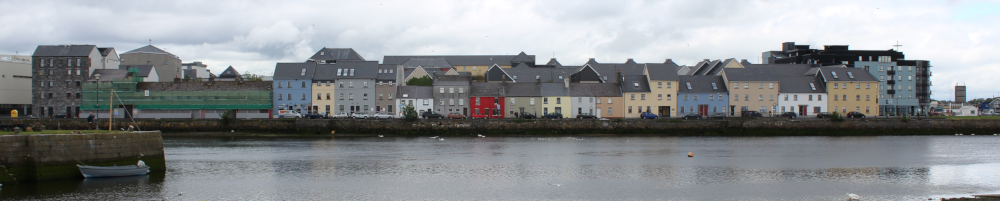

In [147]:
long_walk = Image.open("images/long_walk.png")
long_walk

* Convert the image to an array, then check its shape and data type.

In [148]:
picture = np.asarray(long_walk)
print(picture.shape)
print(picture.dtype)

(201, 1000, 3)
uint8


## 1. Edge Detection.

1. Recall the edge detection procedure based on **Sobel filters** from the lectures.  Write a function `edginess` that takes a digital image, that is a numpy array of shape `(rows, cols, 3)` and data type `uint8`, as input and returns the result of the edge detection as an array of the same shape and data type (so it can be viewed as an image).

In [149]:
def edginess(image: np.ndarray) -> np.ndarray:
    # Define the 3x3 Sobel Kernels
    Gx = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1],
                               [ 0,  0,  0],
                               [ 1,  2,  1]])

    # Initialize gradient matrices
    dx = np.zeros_like(image, dtype=np.float32)
    dy = np.zeros_like(image, dtype=np.float32)

    # Get the dimensions of the image
    rows, cols, _ = image.shape

    # Apply the Sobel filter to each pixel (excluding the border pixels)
    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            for k in range(3):  # For each color channel
                gx = 0
                gy = 0
                for i in range(3):  # Convolution with Gx and Gy
                    for j in range(3):
                        gx += Gx[i, j] * float(image[r - i + 1, c - j + 1, k])
                        gy += Gy[i, j] * float(image[r - i + 1, c - j + 1, k])

                dx[r, c, k] = gx
                dy[r, c, k] = gy

    # Calculate the gradient magnitude
    edges = np.sqrt(dx**2 + dy**2)

    # Normalize the edges to the range [0, 1] for visualization
    edges = edges / edges.max()
    return edges

2. Apply the `edginess` function to the array `picture` and show the result as an image.

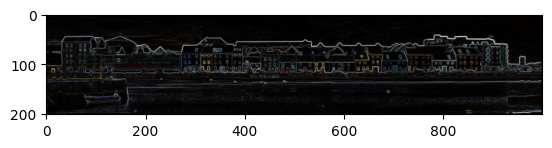

In [150]:
edges = edginess(picture)
plt.imshow(edges)


## 2. Random Image.

1.  Use the random number generator to construct a $(10 \times 20)$-array `numbers` of random integers with values in `range(256)`.

In [151]:
numbers = rng.integers(low=0, high=256, size=(10, 20), dtype=np.uint8)

2. Display the `numbers` array as an image.

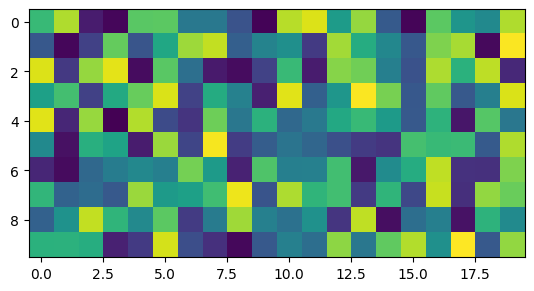

In [152]:
plt.imshow(numbers)

## 3.  Minimal Energy Seams.

1. Implement the minimal energy seam algorithm from the lectures as a function `minimise_paths` which takes a 2D array (of energy values) as input, and returns two arrays of the same shape as the input array, one for the minimal energies, and one for the paths in the form of entries $\pm 1$ and $0$.

In [155]:
def minimise_paths(arr: np.ndarray) -> tuple:
    rows, cols = arr.shape
    mins = np.zeros(arr.shape)
    paths = np.zeros(arr.shape, dtype=int)

    # Bottom row of mins is the same as the bottom row of arr
    mins[-1, :] = arr[-1, :]

    # Loop from second-to-last row to the top row
    for r in reversed(range(rows - 1)):
        for c in range(cols):
            current_val = arr[r, c]
            # Start with the downward value
            minval = current_val + mins[r + 1, c]
            paths[r, c] = 0

            # Check downward-left if within bounds
            if c > 0:
                val = current_val + mins[r + 1, c - 1]
                if val < minval:
                    minval = val
                    paths[r, c] = -1

            # Check downward-right if within bounds
            if c < cols - 1:
                val = current_val + mins[r + 1, c + 1]
                if val < minval:
                    minval = val
                    paths[r, c] = 1

            # Assign the minimum value to mins
            mins[r, c] = minval

    return mins, paths


2. Apply your function `minimise_paths` to the `numbers` array.  Print the top row of the energy values array, and the entire paths array.

In [156]:
mins, paths = minimise_paths(numbers)
print("Top row of energy values:", mins[0])
print("Paths array:", paths)


Top row of energy values: [598. 651. 447. 477. 765. 766. 721. 568. 532. 469. 708. 722. 621. 751.
 563. 494. 680. 525. 513. 616.]
Paths array: [[ 1  0 -1 -1  0 -1  1  1  0 -1  1  0 -1  1  1  0 -1  1  0 -1]
 [ 1  0 -1  1  0 -1  1  1  0 -1 -1  0 -1  1  1  0 -1  0  1  0]
 [ 0  1  0 -1 -1  1  0 -1  1  0 -1  0 -1 -1  1  0  1  0 -1 -1]
 [ 1  0 -1  0 -1  0 -1  1  0 -1  1  0 -1  1  1  0  1  0 -1  0]
 [ 1  0 -1  1  0 -1  0  1  0 -1 -1  1  1  1  0 -1  0  1  0 -1]
 [ 1  0 -1 -1 -1  0 -1  1  0 -1  0 -1  1  0 -1 -1  1  1  0 -1]
 [ 1  1  1  0 -1  0 -1 -1  1  0 -1  0  1  0 -1  0  1  0 -1 -1]
 [ 0 -1  1  1  0  1  0 -1 -1  0 -1  1  0  1  0 -1  1  0 -1  0]
 [ 0  1  1  0 -1 -1  1  1  0 -1 -1  0 -1  0 -1  1  0  1  0 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


3. Compute a 2D array `sum_edges` from the `edges` array by adding up all $3$ color intensities at each pixel.  Then apply the function `minimise_paths` to the array `sum_edges[:, 1:-1]` and print the minimum and the maximum value of the top row of the resulting energy matrix.  (It is necessary to **exclude the first and last column** from the `minimise_paths` calculation, as those columns consists entirely of zeros.)

In [ ]:

# Summing along the last dimension (color channels)
sum_edges = edges.sum(axis=2)  

# Exclude first and last columns
sliced_edges = sum_edges[:, 1:-1]

# Apply minimise_paths
mins, paths = minimise_paths(sliced_edges)

# Extract minimum and maximum from the top row of the energy matrix
top_row = mins[0, :]
min_val = np.min(top_row)
max_val = np.max(top_row)

## 4. Highlighting and Removing Seams

1. Implement a function `highlight_path` which takes as input an image, a column index, and a paths matrix described in terms of $\pm1$ and $0$, and constructs and returns an image with the path described in this way is highlighted in red.

In [ ]:
def highlight_path(im, col, paths):
    new = im.copy()

    ### your code here ...
    
    return new

2. Apply the function `highlight_path` to the long walk picture  and the paths matrix from its `sum_edges` energy array starting at a column index between $400$ and $600$.

3. Implement a function `remove_path` which (somewhat different from the lecture) takes as input an image, a column index, and a paths matrix in terms of $\pm1$ and $0$, and constructs and returns an image with the path described in this way is removed.

In [ ]:
def remove_path(im, col, paths):
    
    # the new image has one column less
    new = np.zeros_like(im)[:, 1:]

    ### your code here ...
    
    return new

4.  In relation to the `sum_edges` matrix above, determine the column index of the seam of minimal energy, then remove the corresponding seam from the long walk picture.

## 5. Seam Carving.

1. Combine the functions into one that takes an image as argument, 1. determines the edginess of the image, 2. uses the edginess to identify the seam of minimal energy, 3. removes the seam from the image and 4. returns the reduced image.

In [ ]:
def carved(im):

    ### your code here ...
    
    return new

2. Apply the function to the long walk image

3.  Use a `for` loop to apply the above procedure sufficiently often to the long walk image until the image is half as wide as before.  This might take a while ... perhaps 20 mins or more ... (if this takes too long apply the procedure to a smaller clip of the picture).

##  Submit your work in PDF format!